# Reaction time

In [ ]:
from glob import glob

import matplotlib.pyplot as plt
from IPython.display import Image
from tqdm import tqdm

from gtheory import config as cf
from gtheory.utils.misc import sort_path

# Reaction time: Local & Global
The short-term and long-term of RT is introduced here to categorize the collected EEG trials into distinct groups of the vigilance state. The local RT is the duration between the deviation onset and response onset, as defined in [33], to evaluate the instant response to the current lane-departure. 


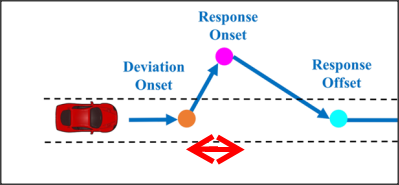

The global RT, an
average of RTl of the trials within the preceding or following windows, evaluates the long-term transition of the vigilance state. For
example, the RTg of the t-th trial can be calculated as the following:


\begin{equation*}
\text{globalRT}(l) = \sum _{i = l - n}^{l + n}\frac{\text{localRT}(i)}{2n + 1}\tag{1}
\end{equation*}

In [2]:
import pandas as pd
arr=[6772,7182, 8570, 11078,11646,13426,16996,17514,18408,22128,22520,23532,26164,26590,30636,3119,32166,34774]
df=pd.DataFrame(arr,columns=['a'])
w = 2
df['avg'] = df['a'].rolling(2 * w + 1, center=True, min_periods=1).mean()
print(df)

# index   index_of_average avg
#
# 0        0,1,2           7508.00
# 1        0,1,2,3         8400.50
# 2        0,1,2,3,4       9049.60
# ...
# 9        7,8,9,10,11     20820.40
# 10       8,9,10,11,12    22550.40

        a       avg
0    6772   7508.00
1    7182   8400.50
2    8570   9049.60
3   11078  10380.40
4   11646  12343.20
5   13426  14132.00
6   16996  15598.00
7   17514  17694.40
8   18408  19513.20
9   22128  20820.40
10  22520  22550.40
11  23532  24186.80
12  26164  25888.40
13  26590  22008.20
14  30636  23735.00
15   3119  25457.00
16  32166  25173.75
17  34774  23353.00


As the distribution of RTl  RTg shown in Fig. 5, the t-th trial
could be assigned into five classes of vigilance states as follows:
where the cluster A and the cluster D locating on the diagonal
ðRTl ffi RTgÞ, represent alertness and drowsiness, respectively. The
cluster C ðRTl > RTgÞ represents the inattention episodes in which
the subject momentarily distracted attention from the driving task,
resulting in RTl being slower than RTg. The cluster E ðRTl < RTgÞ is
the abrupt-awaking case that a drowsy subject ðRTg P 2:1Þ was
suddenly roused by perceiving the motion cue and responded
rapidly to the current trial; nevertheless, the subject still fell asleep
on the next trials. The trials of cluster B were omitted since the transition state showed a large variability of behaviors between subjects. Therefore, the present study will demonstrate the feasibility
of the proposed model for the four-class recognition problem (Def by author of the paper)


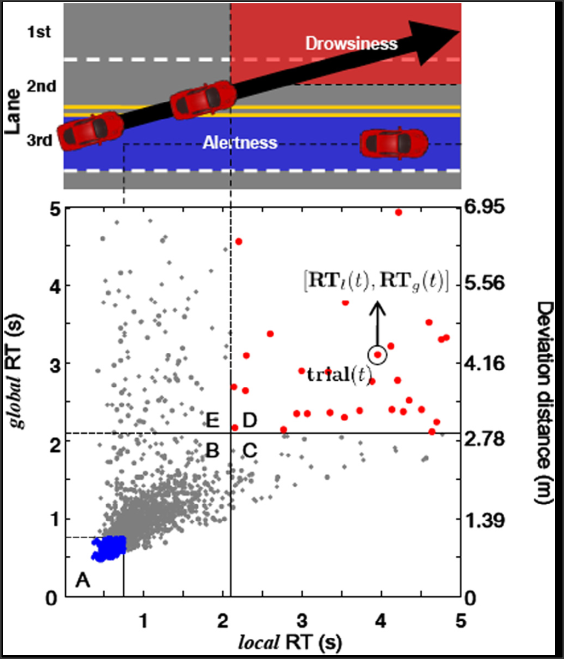

Fig. 5. The distribution of all trials with the local RT as the horizontal axis and theglobal RT as the vertical is. The characters A to E represent the five types of vigilance states: A: alertness (high-performance driving), B: transition, C: alertness but inattention, D: drowsiness (low-performance driving), and E: drowsiness but abrupt-awake. The two dotted lines located at 0.7 s and 2.1 s represent the upper bound and the lower bound of A and D, respectively.

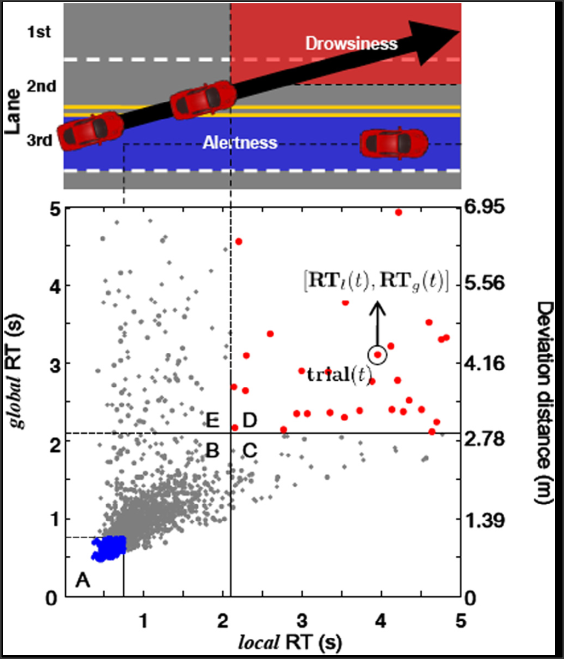

In [3]:
Image(filename ="../image/label_arrangement.png", width=1, height=1)

# Using kmeans to group the cluster

In [4]:
from gtheory.task_state import get_global as gg
pt = cf.root_path ()
xpath=sort_path ( glob ( f"{pt ['dir_root']}/*/*/raw-event.feather" ) )
w = 2
df_ls=[gg ( pd.read_feather ( fpath ), w )for fpath in tqdm ( xpath )]
df_all_sbj = pd.concat(df_ls).reset_index(drop=True)

100%|██████████| 62/62 [00:01<00:00, 52.86it/s]


Let visualise the data distribution using boxplot. Notice that, there are few
instances where the local RT can be up to 600s

<AxesSubplot:>

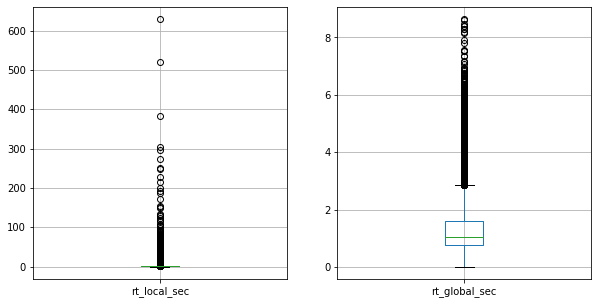

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
df_all_sbj.boxplot(column=['rt_local_sec'],ax=ax[0])
df_all_sbj.boxplot(column=['rt_global_sec'],ax=ax[1])

Lets filter out events that occur more than 9 sec.

The selection of 9s is motivated by the experiment setting where consec trial was introduced/occurred within a 5–10 second interval after finishing the current trial, during which the subject had to maneuverer the car
back to the centre line of the third car lane.

<AxesSubplot:>

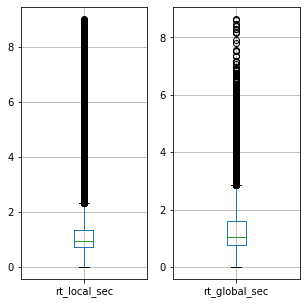

In [6]:
df_all_sbj=df_all_sbj[df_all_sbj['rt_local_sec'] < 9]
df_all_sbj=df_all_sbj[df_all_sbj['rt_global_sec'] < 9]

# noinspection PyRedeclaration
fig, ax = plt.subplots(1, 2, figsize=(5, 5))
df_all_sbj.boxplot(column=['rt_local_sec'],ax=ax[0])
df_all_sbj.boxplot(column=['rt_global_sec'],ax=ax[1])


# Lets visualise the data points distribution

<AxesSubplot:xlabel='rt_local_sec', ylabel='rt_global_sec'>

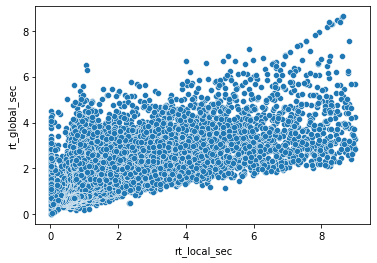

In [7]:
import seaborn as sns

scatterplot = sns.scatterplot (data=df_all_sbj ,x='rt_local_sec' ,y='rt_global_sec')

# Is there any optimum k?
https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

In [8]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
data=df_all_sbj[['rt_local_sec','rt_global_sec']].to_numpy()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


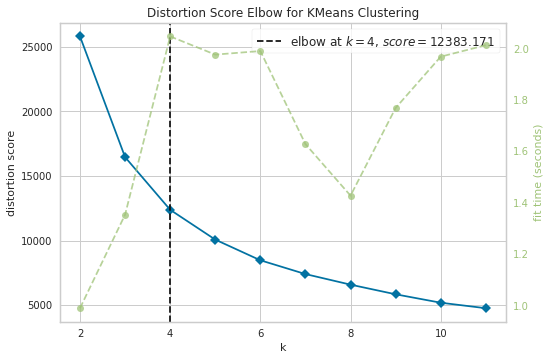

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))

visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

By default, the scoring parameter metric is set to distortion, which computes the sum of squared distances from each point to its assigned center. However, two other metrics can also be used with the KElbowVisualizer – silhouette and calinski_harabasz. The silhouette score calculates the mean Silhouette Coefficient of all samples, while the calinski_harabasz score computes the ratio of dispersion between and within clusters.

By default, the parameter locate_elbow is set to True, which automatically find the “elbow” which likely corresponds to the optimal value of k using the “knee point detection algorithm”. However, users can turn off the feature by setting locate_elbow=False. You can read about the implementation of this algorithm at “Knee point detection in Python” by Kevin Arvai.

# Clusterring using kmeans with k=3,4,5
kmean


https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

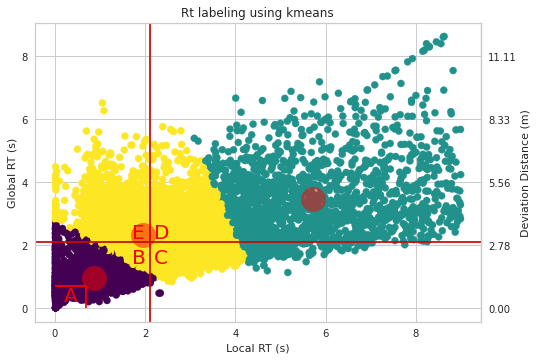

In [16]:

from sklearn.cluster import KMeans
from gtheory.cluster import viz_prediction_kmeans
kmeans3= KMeans(init='k-means++', n_clusters=3, n_init=10).fit(data)
viz_prediction_kmeans (data, kmeans3)

Lets try with 4 cluster

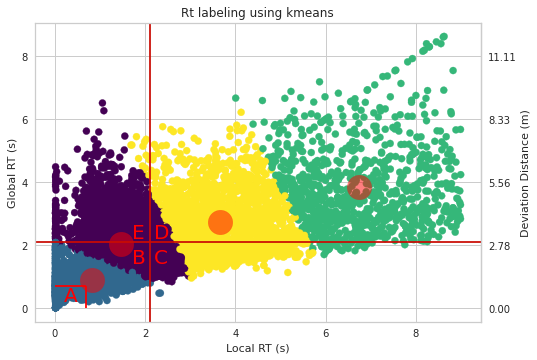

In [17]:
kmeans4= KMeans(init='k-means++', n_clusters=4, n_init=10).fit(data)
viz_prediction_kmeans (data, kmeans4)

Lets try with 5 cluster

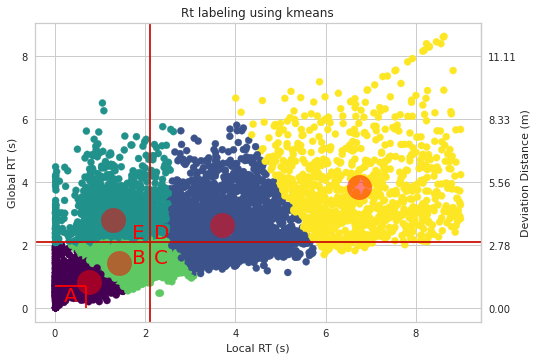

In [18]:
kmeans5= KMeans(init='k-means++', n_clusters=5, n_init=10).fit(data)
viz_prediction_kmeans (data, kmeans5)

In [ ]:
# from gtheory.reporting import get_cluster_per_subject

# Show data distribution for 2,3,4,5 cluster in excel file

In [10]:
from glob import glob
from gtheory.utils.misc import sort_path, check_make_folder
from gtheory.reporting import get_cluster_per_subject
from gtheory import config as cf
import pandas as pd
from tabulate import tabulate
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199
pt = cf.root_path ()
for nclus in [2,3,4,5]:
    ncluster = f'ncluster_{nclus}'
    print(f'Number cluster: {ncluster}')
    xpath = sort_path ( glob ( f"{pt ['dir_root']}/*/*/filtered-event.feather" ) )
    df=get_cluster_per_subject ( xpath, ncluster, psave=None )
    print(tabulate(df, headers='keys', tablefmt='psql'))


Number cluster: ncluster_2


100%|██████████| 62/62 [00:00<00:00, 94.92it/s]


+------------------------+-------+------+-------+
|                        |     0 |    1 |   All |
|------------------------+-------+------+-------|
| ('S01', 'm', '051017') |   167 |   17 |   184 |
| ('S01', 'n', '060227') |   191 |   39 |   230 |
| ('S01', 'n', '060926') |   561 |   15 |   576 |
| ('S01', 'n', '061102') |   427 |   65 |   492 |
| ('S02', 'm', '050921') |   331 |    1 |   332 |
| ('S02', 'm', '051115') |   341 |    1 |   342 |
| ('S04', 'm', '051130') |   321 |   38 |   359 |
| ('S05', 'm', '051120') |   321 |   38 |   359 |
| ('S05', 'm', '061019') |   635 |   39 |   674 |
| ('S05', 'n', '060308') |   340 |   16 |   356 |
| ('S05', 'n', '061101') |   665 |   51 |   716 |
| ('S06', 'm', '051119') |   351 |    7 |   358 |
| ('S09', 'n', '060313') |   227 |   13 |   240 |
| ('S09', 'n', '060317') |   164 |    4 |   168 |
| ('S09', 'n', '060720') |   204 |   26 |   230 |
| ('S11', 'n', '060920') |   405 |   16 |   421 |
| ('S12', 'm', '060710') |   228 |  347 |   575 |


100%|██████████| 62/62 [00:00<00:00, 91.63it/s]


+------------------------+-------+------+------+-------+
|                        |     0 |    1 |    2 |   All |
|------------------------+-------+------+------+-------|
| ('S01', 'm', '051017') |   151 |   15 |   18 |   184 |
| ('S01', 'n', '060227') |   147 |   30 |   53 |   230 |
| ('S01', 'n', '060926') |   486 |    8 |   82 |   576 |
| ('S01', 'n', '061102') |   269 |   55 |  168 |   492 |
| ('S02', 'm', '050921') |   328 |    1 |    3 |   332 |
| ('S02', 'm', '051115') |   333 |  nan |    9 |   342 |
| ('S04', 'm', '051130') |   193 |   12 |  154 |   359 |
| ('S05', 'm', '051120') |   193 |   12 |  154 |   359 |
| ('S05', 'm', '061019') |   584 |   33 |   57 |   674 |
| ('S05', 'n', '060308') |   309 |   10 |   37 |   356 |
| ('S05', 'n', '061101') |   610 |   37 |   69 |   716 |
| ('S06', 'm', '051119') |   300 |    5 |   53 |   358 |
| ('S09', 'n', '060313') |   210 |   10 |   20 |   240 |
| ('S09', 'n', '060317') |   160 |  nan |    8 |   168 |
| ('S09', 'n', '060720') |   16

100%|██████████| 62/62 [00:00<00:00, 98.57it/s] 


+------------------------+------+-----+------+-------+-------+
|                        |    0 |   1 |    2 |     3 |   All |
|------------------------+------+-----+------+-------+-------|
| ('S01', 'm', '051017') |   24 |   6 |   12 |   142 |   184 |
| ('S01', 'n', '060227') |   58 |  19 |   22 |   131 |   230 |
| ('S01', 'n', '060926') |  148 |   4 |   14 |   410 |   576 |
| ('S01', 'n', '061102') |  242 |  35 |   32 |   183 |   492 |
| ('S02', 'm', '050921') |    7 |   1 |    2 |   322 |   332 |
| ('S02', 'm', '051115') |   13 | nan |    2 |   327 |   342 |
| ('S04', 'm', '051130') |  144 |   2 |   50 |   163 |   359 |
| ('S05', 'm', '051120') |  144 |   2 |   50 |   163 |   359 |
| ('S05', 'm', '061019') |   83 |  21 |   19 |   551 |   674 |
| ('S05', 'n', '060308') |   46 |   5 |   15 |   290 |   356 |
| ('S05', 'n', '061101') |   70 |  20 |   30 |   596 |   716 |
| ('S06', 'm', '051119') |   91 | nan |   13 |   254 |   358 |
| ('S09', 'n', '060313') |   28 |   8 |    6 |   198 | 

100%|██████████| 62/62 [00:00<00:00, 90.78it/s] 


+------------------------+-------+------+------+------+-----+-------+
|                        |     0 |    1 |    2 |    3 |   4 |   All |
|------------------------+-------+------+------+------+-----+-------|
| ('S01', 'm', '051017') |   128 |    9 |   29 |   13 |   5 |   184 |
| ('S01', 'n', '060227') |    81 |   36 |   74 |   20 |  19 |   230 |
| ('S01', 'n', '060926') |   228 |   17 |  312 |   15 |   4 |   576 |
| ('S01', 'n', '061102') |    69 |   77 |  279 |   30 |  37 |   492 |
| ('S02', 'm', '050921') |   306 |    1 |   22 |    2 |   1 |   332 |
| ('S02', 'm', '051115') |   297 |  nan |   43 |    2 | nan |   342 |
| ('S04', 'm', '051130') |   123 |   18 |  159 |   57 |   2 |   359 |
| ('S05', 'm', '051120') |   123 |   18 |  159 |   57 |   2 |   359 |
| ('S05', 'm', '061019') |   472 |   35 |  128 |   17 |  22 |   674 |
| ('S05', 'n', '060308') |   232 |   12 |   93 |   14 |   5 |   356 |
| ('S05', 'n', '061101') |   540 |   35 |   90 |   31 |  20 |   716 |
| ('S06', 'm', '0511